# Predicting whether a person has Diabetes

The diabetes dataset has some features which help deduce if a person has diabetes or not.

### Columns are:
#### Input Features 
**Glucose**: Glucose concentration in a oral test within 2 hours  
**Insulin**: Insulin levels within 2 hours  
**Age**: Age of person

#### Output Feature
**Outcome**: 0 (No Diabetes) or 1(Diabetes)

## Task:
Predict whether a person has diabetes using two features of the three given

### Importing CSV and checking for missing values

In [12]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df = df[df["Insulin"]!=0]
df.head()
df.count()

Glucose    394
Insulin    394
Age        394
Outcome    394
dtype: int64

In [13]:
df = df.dropna()
df

,Glucose,Insulin,Age,Outcome
1,89,94,21,0
6,103,83,33,0
7,126,235,27,0
9,97,140,22,0
10,145,110,57,0
13,88,54,22,0
16,103,192,33,0
18,180,70,26,0
25,103,82,22,0
26,101,36,26,0


#### After dropping na values, count remains same so there are no missing rows.

### Glucose and Insulin variation for Diabetics and Non Diabetics at the age of 25

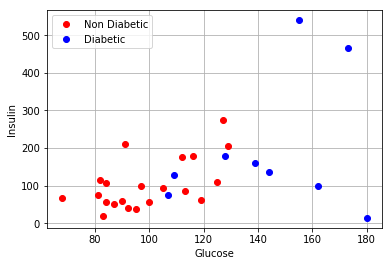

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

nondia = df[df["Age"]==25]
nondia = nondia[nondia["Outcome"]==0]

dia = df[df["Age"]==25]
dia = dia[dia["Outcome"]==1]

plt.plot(nondia["Glucose"],nondia["Insulin"],"ro",label="Non Diabetic")
plt.plot(dia["Glucose"],dia["Insulin"],"bo",label="Diabetic")
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend()
plt.grid()


### Identifying age when person is most susceptible to Diabetes

In [15]:
content = df[df["Outcome"] == 1]
print("At the age of: {0:d}".format(content["Age"].value_counts().index[0]))

At the age of: 25


### Pairwise Scatter Plot of every feature

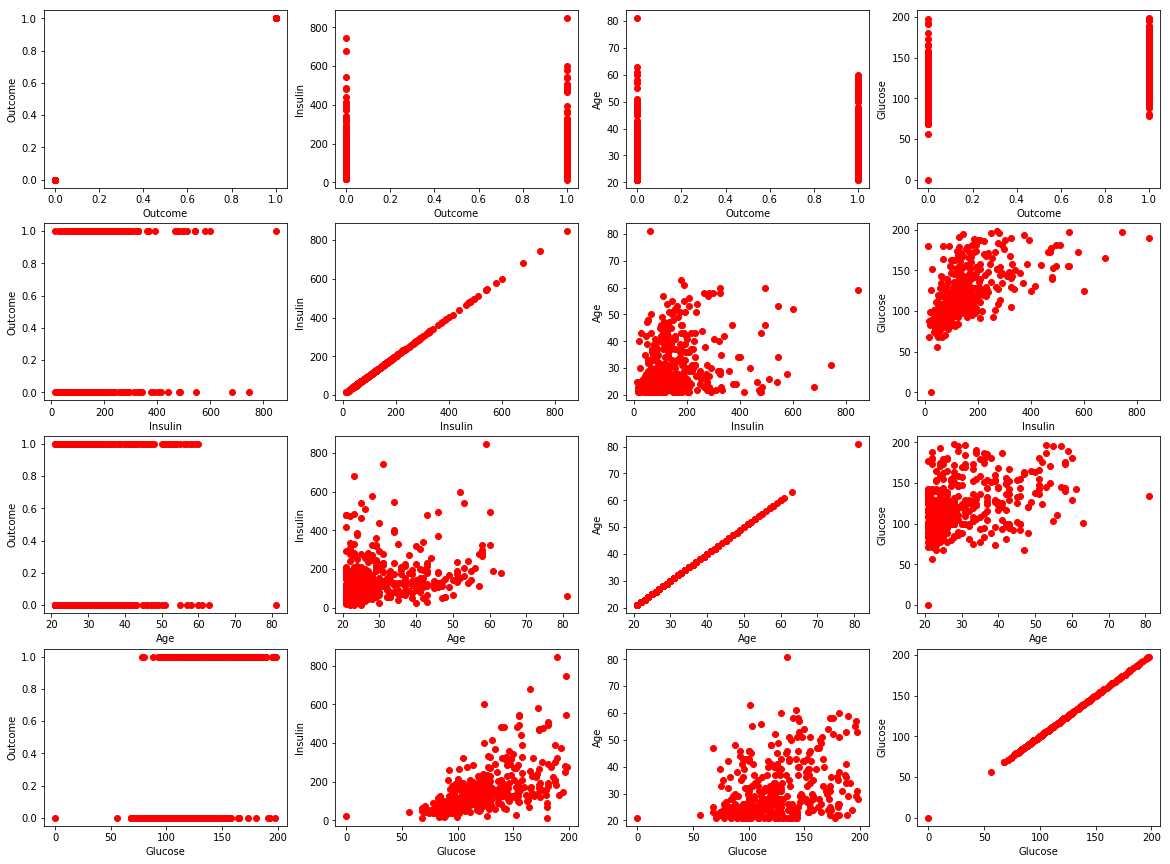

In [16]:
cols = {"Glucose","Insulin","Age","Outcome"}
i=0
plt.figure(figsize=(20,15))
for everyval in cols:
    for everycol in cols:
        plt.subplot(4,4,i+1)
        plt.plot(df[everyval],df[everycol],"ro")
        plt.xlabel(everyval)
        plt.ylabel(everycol)
        i=i+1

#### We observe that there is no relation between Insulin and Outcome

### Designing Perceptron Model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

xtrain, xtest, ytrain, ytest = train_test_split(df[["Glucose","Age"]],df["Outcome"],test_size=0.2,random_state=100)
classifier = Perceptron(max_iter=1000)
model = classifier.fit(df[["Glucose","Age"]],df["Outcome"])


#### Predicting for Age 43 and Glucose 114

In [18]:
ne = {"Glucose":[114],"Age":[43]}
new = pd.DataFrame(data=ne)
model.predict(new)

array([0], dtype=int64)

### Plotting separation using Meshgrid

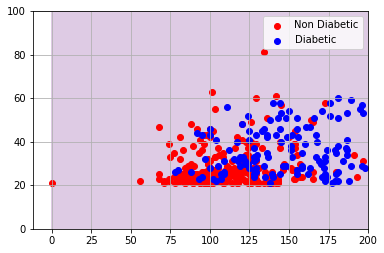

In [19]:
plt.figure()
import numpy as np

x_min,x_max = 0,200
y_min,y_max = 0,100

xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
xx_lin = xx.ravel()
yy_lin = yy.ravel()
pred_input = np.c_[xx_lin,yy_lin]
Z = model.predict(pred_input)
Z = Z.reshape(xx.shape)
#contour plot requires 2dimensional matrix
plt.contourf(xx,yy,Z,cmap=plt.cm.Pastel1)

plt.scatter(df["Glucose"][df.Outcome == 0],df["Age"][df.Outcome == 0],color="r",label="Non Diabetic")
plt.scatter(df["Glucose"][df.Outcome == 1],df["Age"][df.Outcome == 1],color="b",label="Diabetic")
plt.legend()
plt.grid()
plt.show()